<a href="https://colab.research.google.com/github/Abadi-kfupm/Student/blob/main/EM502Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [607]:
# Introduction
# Python coding is an easy and powerful tools for programming
# Can be obtained from Chatgpt, lierature or expert
# While coding, python predicts and suggests text and steps

In [608]:
# Liberaries

In [609]:
# Importing all required liberaries for this code
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy.stats import zscore
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [610]:
# Dataset

In [611]:
#Loding Dataset
df = pd.read_csv('https://raw.githubusercontent.com/Abadi-kfupm/Student/refs/heads/main/cars_data')

In [612]:
# Data attributes
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [613]:
# Visualizing Four rows of dataset or df (for all)
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [614]:
# Overall information about the size and categories of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [615]:
# Missing Data In each category
df.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [616]:
# Brief Statistical description of the numerical data
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [617]:
# Categorical Data

In [618]:
# Disply names in column list
print(df['Car_Name'].value_counts())

Car_Name
city                  26
corolla altis         16
verna                 14
fortuner              11
brio                  10
                      ..
Honda Activa 125       1
Hero Hunk              1
Hero  Ignitor Disc     1
Hero  CBZ Xtreme       1
Bajaj  ct 100          1
Name: count, Length: 98, dtype: int64


In [619]:
# Disply types in column list
print(df['Fuel_Type'].value_counts())
fuel_type = df['Fuel_Type']

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [620]:
# Disply types in column list
print(df['Seller_Type'].value_counts())
seller_type = df['Seller_Type']

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [621]:
# Disply types in column list
print(df['Transmission'].value_counts())
transmission_type = df['Transmission']

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [622]:
# Categorical Data Visualization

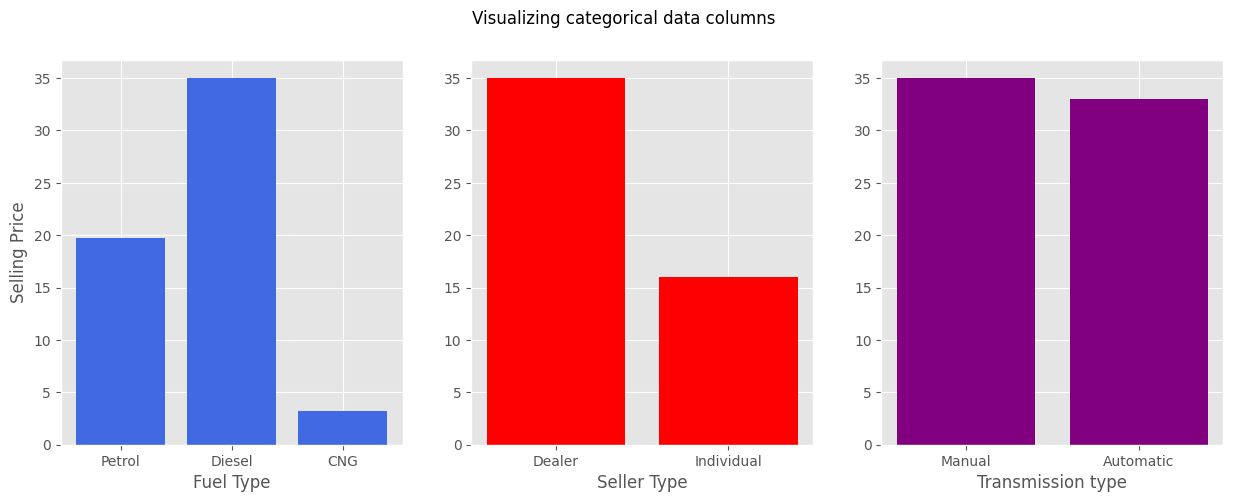

In [623]:
# Visualizing categorical data columns ( Variation with The Selling Price will be considered for all attributes)
selling_price = df['Selling_Price']

from matplotlib import style
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
fig.suptitle('Visualizing categorical data columns')
plt.subplot(1, 3, 1)
plt.bar(fuel_type, selling_price, color='royalblue')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type, selling_price, color='red')
plt.xlabel("Seller Type")
plt.subplot(1,3,3)
plt.bar(transmission_type, selling_price, color='purple')
plt.xlabel('Transmission type')
plt.show()

In [624]:
# Numerical Data Visualization

In [625]:
# Distribution of Year Column

In [626]:
# Histogram distribution skewing to the right (Most cars' brands were between 2013 and 2017)
# Box-plot outliers in early years
fig = px.histogram(df,
                   x='Year',
                   marginal='box',
                   nbins=16,
                   title='Brands of Same Year')
fig.update_layout(bargap=0.1)
fig.show()


In [627]:
# Selling Price Distribution

In [628]:
# Histogram distribution skewing to the left (Majority of cars were quoted at less than 6 units of Selling Price)
# Box-plot outliers in recent years (Manual)
fig = px.histogram(df,
                   x='Selling_Price',
                   marginal='box',
                   color='Transmission',
                   color_discrete_sequence=['green', 'grey'],
                   title=' Number of Cars With Same Selling Price ')
fig.update_layout(bargap=0.1)
fig.show()

In [629]:
# Present Price Ditribution

In [630]:
#Histogram distribution skewing to the left (A gradual decrease in number of cars with higher Present Price)
# Box-plot outliers in most recent years
fig = px.histogram(df,
                   x='Present_Price',
                   marginal='box',
                   color='Transmission',
                   color_discrete_sequence=['green', 'grey'],
                   title='Number of Cars With Same Preset Price')
fig.update_layout(bargap=0.1)
fig.show()

In [631]:
# Kilometers Driven Distribution

In [632]:
# Histogram distribution skewing to the left (Majority of cars were driven less than 100k)
# Box-plot outliers in the number of cars driven more than 100K
fig = px.histogram(df,
                   x='Kms_Driven',
                   marginal='box',
                   color_discrete_sequence=['green', 'grey'],
                   title='Number of Cars With Same Kilometers Dreven')
fig.update_layout(bargap=0.1)
fig.show()

In [633]:
# Correlation With Selling Price

In [634]:
# Kilometers Driven
# Scatter plot showing that most of cars had Kms Driven lower than 100k with slight increase in Selling Price
# No clear correlation.

fig = px.scatter(df,
                 x='Kms_Driven',
                 y='Selling_Price',
                 opacity=0.8,
                 title='Selling Price vs Kms Driven')
fig.update_traces(marker_size=5)
fig.show()

In [635]:
# Correllation Coefficient (kms_Driven)
df.Selling_Price.corr(df.Kms_Driven)

np.float64(0.029187090674291236)

In [636]:
# Year
# Scatter plot showing that mojority of recent cars had higher Selling Price
# Slightly Correlated
fig = px.scatter(df,
                 x='Year',
                 y='Selling_Price',
                 opacity=0.8,
                 title='Selling Price vs. Year')
fig.update_traces(marker_size=5)
fig.show()

In [637]:
# Correllation Coefficient (Year)
df.Selling_Price.corr(df.Year)

np.float64(0.23614098016042737)

In [638]:
# Present Price
# Scatter plot showing that the Selling Price of most cars increasd when the Present Price increased
# Almost linear Correlation
fig = px.scatter(df,
                 x='Present_Price',
                 y='Selling_Price',
                 opacity=0.8,
                 title='Selling Price vs Present Price')
fig.update_traces(marker_size=5)
fig.show()

In [639]:
# Correllation Coefficient(Present Price)
df.Selling_Price.corr(df.Present_Price)

np.float64(0.8789825451614951)

In [640]:
# The degree of correlation between each two variables (attributes)

# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Display the correlation matrix
print(correlation_matrix)

                   Year  Selling_Price  Present_Price  Kms_Driven     Owner
Year           1.000000       0.236141      -0.047584   -0.524342 -0.182104
Selling_Price  0.236141       1.000000       0.878983    0.029187 -0.088344
Present_Price -0.047584       0.878983       1.000000    0.203647  0.008057
Kms_Driven    -0.524342       0.029187       0.203647    1.000000  0.089216
Owner         -0.182104      -0.088344       0.008057    0.089216  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

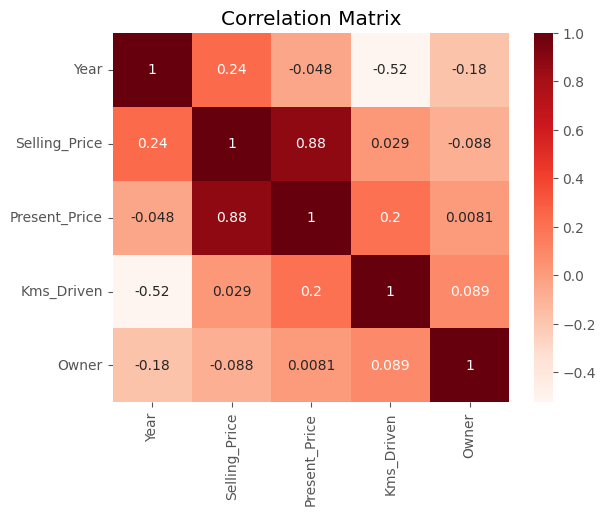

In [641]:
# Display the correlation matrix as a heatmap
# Similar repersentation of degree of correlation between each two variables (attributes)
sns.heatmap(correlation_matrix, cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [642]:
# Linear Regression

In [643]:
# Simple Linear Regression (Selling Price vs Present Price)
# Only one attribute (variable) will be considered
# The aim is to develop a linear relation to calculate the selling prices (as output data)
# The Present( as input data) will considered in the model (or equation)
# Python code for simple linear regression is show as follows(i.e  text prediction and suggestion):

model = LinearRegression()

# Divide the data into inputs and outputs that will be used to train the model (i.e. determining β0 and β1)

input = df[['Present_Price']]
output = df.Selling_Price

# The test data is 20%, the training data is 80%, coded as follows:

inputs_train, inputs_test, outputs_train, outputs_test = train_test_split(inputs, outputs, test_size=0.2, random_state=42)

# Train the model, this method will find the best line that fits the data
# This method also minimize the error using the techniques discussed earlier

model.fit(inputs,outputs)

LinearRegression()

In [644]:
# 80% Training Samples of Presnt Price as input data, column and index number
print(inputs_train)

     Present_Price
184          0.750
132          0.950
194          0.787
75           6.800
111          1.500
..             ...
188          0.570
71          12.480
106          3.450
270         10.000
102          1.780

[240 rows x 1 columns]


In [645]:
# Corrosponding (80%) Selling Prices as output data, column and index number
print(outputs_train)

184    0.25
132    0.75
194    0.20
75     3.95
111    1.15
       ... 
188    0.25
71     4.50
106    1.35
270    4.10
102    1.65
Name: Selling_Price, Length: 240, dtype: float64


In [646]:
# β1 (slope)
print(model.coef_)

# β0 (intercept)
print(model.intercept_)

[0.51684903]
0.7185274709817686


In [647]:
# 20% Presnt Price Samples To Be Tested as input data, column and index number
print(inputs_test)

     Present_Price
177           0.57
289          13.60
228           9.40
198           0.57
60           18.61
..             ...
234           5.70
296          11.60
281           7.60
285           8.50
182           0.58

[61 rows x 1 columns]


In [648]:
# The simple regression model (or by following python text prediction and suggestion)is given by :
predicted_selling_price = model.intercept_ + model.coef_[0] * inputs_test.Present_Price

In [649]:
# Predicted Selling Price (with Regression Model) corrosponding to input data, column and index number
print(predicted_selling_price)

177     1.013131
289     7.747674
228     5.576908
198     1.013131
60     10.337088
         ...    
234     3.664567
296     6.713976
281     4.646580
285     5.111744
182     1.018300
Name: Present_Price, Length: 61, dtype: float64


In [650]:
#  Actual Selling Prices (20%) output data, column and index number
print(outputs_test)

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64


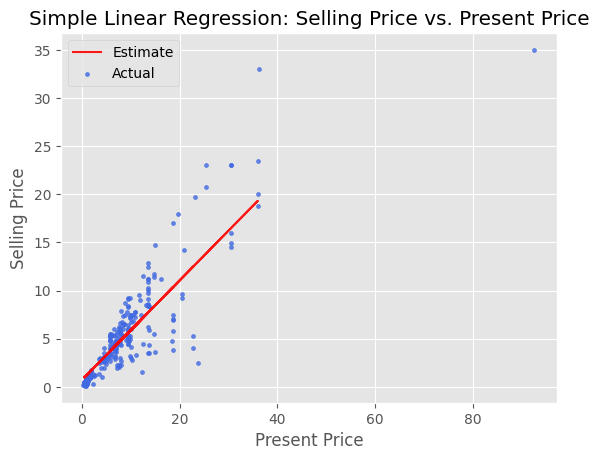

In [651]:
# Visualizing the regression line
plt.plot(inputs_test.Present_Price, predicted_selling_price, 'r', alpha=0.9)
outputs = df.Selling_Price
plt.scatter(df.Present_Price, outputs, color='royalblue', s=8,alpha=0.8)
plt.xlabel('Present Price')
plt.ylabel('Selling Price')
plt.title("Simple Linear Regression: Selling Price vs. Present Price")
plt.legend(['Estimate', 'Actual'])


In [652]:
# Evaluating the model

# We compare the predicted selling price with the actual selling price
#(which are corrosponding outputs to the presnt price test data used)
# The accuracy of the model is meassured by calculating the error as follows:

mae = mean_absolute_error(outputs_test, predicted_selling_price)
rmse = np.sqrt(mean_squared_error(outputs_test, predicted_selling_price))
r2 = r2_score(outputs_test, predicted_selling_price)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")


Mean Absolute Error (MAE): 1.7756517349034633
Root Mean Squared Error (RMSE): 2.674393858068127
R-squared (R2): 0.68950722731726


In [653]:
# Multible Linear Regression Model 1

In [654]:
# Here more than one attribute (variable) will be considered
# The aim is to develop a linear relation to calculate the selling prices (as output data)
# The Year, Present Price and Kms_Driven ( as input data) in the model (or equation)
# The effect of each variable will be added through its coeffient (β1, β2, β3) in the equation

inputs1 = df[['Year','Present_Price','Kms_Driven']]
outputs1 = df.Selling_Price
print(inputs1)
print(outputs1)

     Year  Present_Price  Kms_Driven
0    2014           5.59       27000
1    2013           9.54       43000
2    2017           9.85        6900
3    2011           4.15        5200
4    2014           6.87       42450
..    ...            ...         ...
296  2016          11.60       33988
297  2015           5.90       60000
298  2009          11.00       87934
299  2017          12.50        9000
300  2016           5.90        5464

[301 rows x 3 columns]
0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [655]:
# The inputs and Outputs data will be divided into training and testing sets
# Training (to find the coeffients) and testing (to see the prediction accuracy)
# Example split the data into (80% Training and 20% Testing)
# Using Python coding (i.e text prediction and suggestion ) as follows:

inputs1_train, inputs1_test, outputs1_train, outputs1_test = train_test_split(inputs1, outputs1, test_size=0.2, random_state=42)

In [656]:
# Training Data
print(inputs1_train)
print(outputs1_train)

     Year  Present_Price  Kms_Driven
184  2008          0.750       26000
132  2017          0.950        3500
194  2008          0.787       50000
75   2015          6.800       36000
111  2016          1.500        8700
..    ...            ...         ...
188  2013          0.570       18000
71   2011         12.480       45000
106  2014          3.450       16500
270  2011         10.000       69341
102  2017          1.780        4000

[240 rows x 3 columns]
184    0.25
132    0.75
194    0.20
75     3.95
111    1.15
       ... 
188    0.25
71     4.50
106    1.35
270    4.10
102    1.65
Name: Selling_Price, Length: 240, dtype: float64


In [657]:
# Create and train the model using Python coding (i.e text prediction and suggestion )
mlr_model1 = LinearRegression()
mlr_model1.fit(inputs1_train, outputs1_train)

LinearRegression()

In [658]:
# Model Coefficients and Intercept
print(mlr_model1.coef_)
print(mlr_model1.intercept_)

[ 4.43962472e-01  5.15430469e-01 -7.45847218e-07]
-893.1959328776992


In [659]:
# Input testing data (20%) with their columns and index number
print(inputs1_test)

     Year  Present_Price  Kms_Driven
177  2016           0.57       24000
289  2016          13.60       10980
228  2012           9.40       60000
198  2011           0.57       35000
60   2013          18.61       40001
..    ...            ...         ...
234  2015           5.70        4492
296  2016          11.60       33988
281  2006           7.60       50456
285  2016           8.50       15059
182  2013           0.58       30000

[61 rows x 3 columns]


In [660]:
# The multible regression model (or by following python text prediction and suggestion) is given by :
Model1_Predect = mlr_model1.intercept_ + mlr_model1.coef_[0] * inputs1_test['Year'] + mlr_model1.coef_[1] *  inputs1_test['Present_Price'] + mlr_model1.coef_[2] * inputs1_test['Kms_Driven']

In [661]:
# Model Prediction (based on 20% input testing data) with input data, column and index number
print(Model1_Predect)

177     2.108305
289     8.834075
228     4.856855
198    -0.119712
60     10.062849
         ...    
234     4.323051
296     7.786053
281     1.272424
285     6.202337
182     0.777097
Length: 61, dtype: float64


In [662]:
# The actual output testing data of Selling Price with input data, column and index number
print(outputs1_test)

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64


In [663]:
# Evaluating the model

# We compare the predicted selling price with the actual selling price
# which are corrosponding outputs to the input test data of the 3 variables
# The accuracy of the model is meassured by calculating the error as follows:

mae = mean_absolute_error(outputs1_test, Model1_Predect)
rmse = np.sqrt(mean_squared_error(outputs1_test, Model1_Predect))
r2 = r2_score(outputs1_test, Model1_Predect)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 1.3638305462401648
Root Mean Squared Error (RMSE): 2.00263676943193
R-squared (R2): 0.8258974489339233


In [664]:
# Results and Discussions
# Both the absute error and the root mean squared error decreased compared to the simple regression model.
# The R-squared increased in value ensurring better accuracy and correllation with input variables.
# The comparison of model predictions to the actual values can be visualized in the following section
# Also the accuracy of the model can be visualized in term of residual error between actul and prediction.

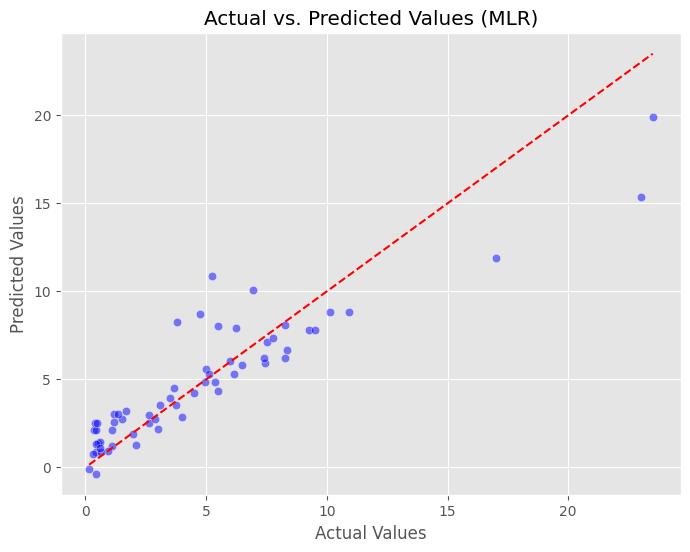

In [665]:
# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=outputs1_test, y= Model1_Predect, color='blue', alpha=0.5)
plt.plot([outputs1_test.min(), outputs1_test.max()], [outputs1_test.min(), outputs1_test.max()], color='red', linestyle='--')  # Identity line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (MLR)')
plt.show()

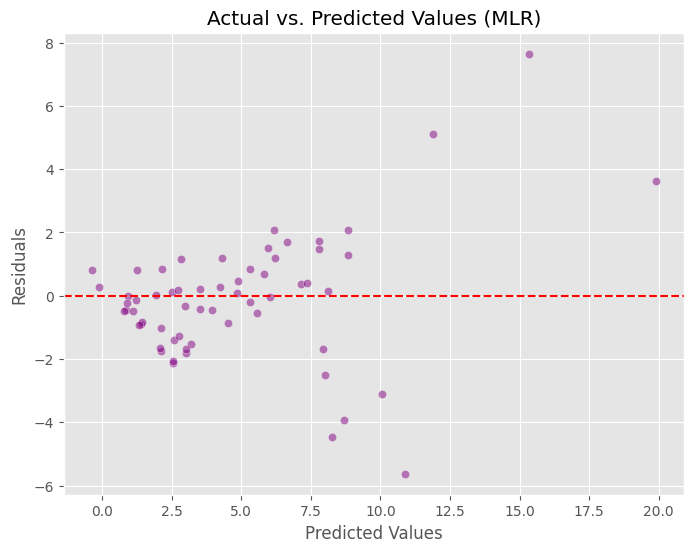

In [666]:
# Residual Plot
residuals = outputs1_test - Model1_Predect
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Model1_Predect, y=residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.title('Actual vs. Predicted Values (MLR)')
plt.show()

In [667]:
# Mulilinrear Regression 2

In [668]:
# Multible Linear Regression Model 2

In [669]:
# Here more than one attribute (variable) will be considered
# The aim is to develop a linear relation to calculate the selling prices (as output data)
# Year, Present Price and Kms_Driven, Seller Type, Fuel Type, Transmission and Owner (as input data)
# The effect of each variable will be added through its coeffient (β1, β2, β3,..) in the equation

In [670]:
# Create inputs and Outputs

inputs3 = df[[
             'Year',
             'Present_Price',
             'Kms_Driven',
             'Seller_Type',
             'Fuel_Type',
             'Transmission',
             'Owner'
            ]]
outputs3 = df.Selling_Price

inputs3 = pd.get_dummies(inputs3,
                        columns=['Seller_Type', 'Fuel_Type', 'Transmission'],
                        drop_first=True) # To avoid multicollinearity

print(inputs3)
print(outputs3)

     Year  Present_Price  Kms_Driven  Owner  Seller_Type_Individual  \
0    2014           5.59       27000      0                   False   
1    2013           9.54       43000      0                   False   
2    2017           9.85        6900      0                   False   
3    2011           4.15        5200      0                   False   
4    2014           6.87       42450      0                   False   
..    ...            ...         ...    ...                     ...   
296  2016          11.60       33988      0                   False   
297  2015           5.90       60000      0                   False   
298  2009          11.00       87934      0                   False   
299  2017          12.50        9000      0                   False   
300  2016           5.90        5464      0                   False   

     Fuel_Type_Diesel  Fuel_Type_Petrol  Transmission_Manual  
0               False              True                 True  
1                True

In [671]:
# The inputs and Outputs data will be divided into training and testing sets
# Training (to find the coeffients) and testing (to see the prediction accuracy)
# Example split the data into (80% Training and 20% Testing)
# Using Python coding (i.e text prediction and suggestion ) as follows:

inputs3_train, inputs3_test, outputs3_train, outputs3_test = train_test_split(inputs3, outputs3, test_size=0.2, random_state=42)


In [672]:
# Training Data
print(inputs3_train)
print(outputs3_train)

     Year  Present_Price  Kms_Driven  Owner  Seller_Type_Individual  \
184  2008          0.750       26000      1                    True   
132  2017          0.950        3500      0                    True   
194  2008          0.787       50000      0                    True   
75   2015          6.800       36000      0                   False   
111  2016          1.500        8700      0                    True   
..    ...            ...         ...    ...                     ...   
188  2013          0.570       18000      0                    True   
71   2011         12.480       45000      0                   False   
106  2014          3.450       16500      1                    True   
270  2011         10.000       69341      0                   False   
102  2017          1.780        4000      0                    True   

     Fuel_Type_Diesel  Fuel_Type_Petrol  Transmission_Manual  
184             False              True                 True  
132             False

In [673]:
# Create and train the model

mlr_model3 = LinearRegression()
mlr_model3.fit(inputs3_train, outputs3_train)

LinearRegression()

In [674]:
# Model Coefficients and Intercept
print(mlr_model3.coef_)
print(mlr_model3.intercept_)

[ 3.53801365e-01  4.29152503e-01 -6.15725866e-06 -9.03759824e-01
 -1.19059291e+00  2.53327258e+00  7.38464226e-01 -1.63902155e+00]
-709.9529230448204


In [675]:
# Input testing data (20%) with their columns and index number
print(inputs3_test)

     Year  Present_Price  Kms_Driven  Owner  Seller_Type_Individual  \
177  2016           0.57       24000      0                    True   
289  2016          13.60       10980      0                   False   
228  2012           9.40       60000      0                   False   
198  2011           0.57       35000      1                    True   
60   2013          18.61       40001      0                   False   
..    ...            ...         ...    ...                     ...   
234  2015           5.70        4492      0                   False   
296  2016          11.60       33988      0                   False   
281  2006           7.60       50456      0                   False   
285  2016           8.50       15059      0                   False   
182  2013           0.58       30000      0                    True   

     Fuel_Type_Diesel  Fuel_Type_Petrol  Transmission_Manual  
177             False              True                False  
289             False

In [676]:
# The multible regression model (or by following python text prediction and suggestion) is given by
Model3_Predect = mlr_model3.intercept_ + mlr_model3.coef_[0] * inputs3_test['Year'] + mlr_model3.coef_[1] *  inputs3_test['Present_Price'] + mlr_model3.coef_[2] * inputs3_test['Kms_Driven'] + mlr_model3.coef_[3] * inputs3_test['Seller_Type_Individual']  + mlr_model3.coef_[4] * inputs3_test['Fuel_Type_Diesel'] + mlr_model3.coef_[5] * inputs3_test['Transmission_Manual']  + mlr_model3.coef_[6] * inputs3_test['Owner']

In [677]:
# Model Prediction (based on 20% input testing data) with input data, column and index number
print(Model3_Predect)

177     2.503712
289    11.612769
228     6.902701
198     3.938712
60     12.522729
         ...    
234     7.908611
296     9.422205
281     5.256776
285     6.865703
182     3.942928
Length: 61, dtype: float64


In [678]:
# The actual output testing data of Selling Price as output data, column and index number
print(outputs3_test)

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64


In [679]:
# Evaluating the model

# We compare the predicted selling price with the actual selling price
# which are the corrosponding outputs to the input test data of the 7 variables
# The accuracy of the model is meassured by calculating the error as follows:

mae3 = mean_absolute_error(outputs3_test, Model3_Predect)
rmse3 = np.sqrt(mean_squared_error(outputs3_test, Model3_Predect))
r2_3 = r2_score(outputs3_test, Model3_Predect)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 1.3638305462401648
Root Mean Squared Error (RMSE): 2.00263676943193
R-squared (R2): 0.8258974489339233


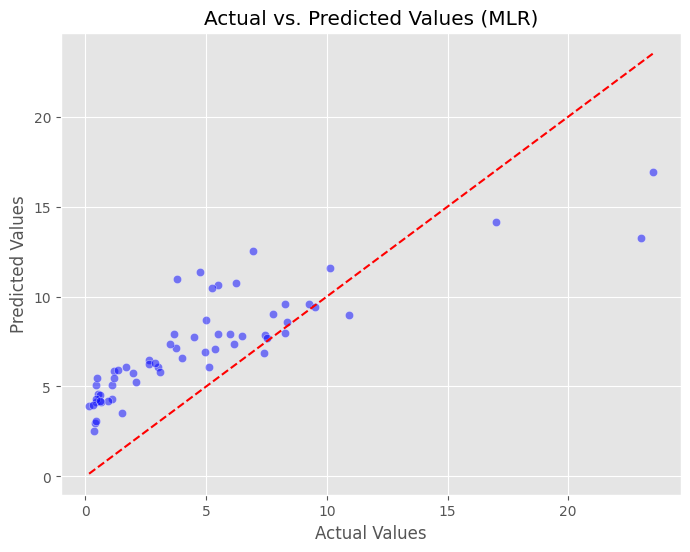

In [680]:
# Scatter plot of Actual vs. Predicted values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=outputs3_test, y= Model3_Predect, color='blue', alpha=0.5)
plt.plot([outputs3_test.min(), outputs3_test.max()], [outputs3_test.min(), outputs3_test.max()], color='red', linestyle='--')  # Identity line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (MLR)')
plt.show()

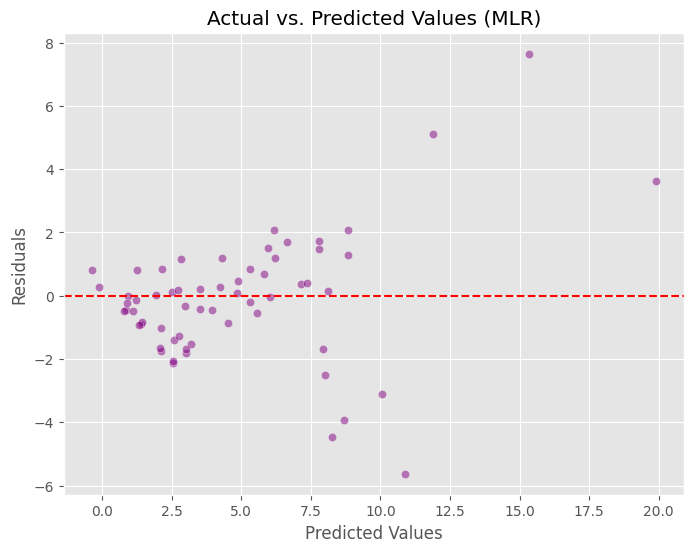

In [681]:
# Residual Plot
residuals = outputs1_test - Model1_Predect
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Model1_Predect, y=residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.title('Actual vs. Predicted Values (MLR)')
plt.show()

In [682]:
# Multible Linear Regression Model 2
# The development of this model consumed most of the time to learn the application
# The model is not explained in a stepwise fashion as it was generated with Chatgpt
# The major diffculty was in considering the non numeric data and their columns.
# The result are same like those detailed in model 3

               Coefficient
Year              0.363623
Present_Price     0.439942
Kms_Driven       -0.000005
Fuel_Type        -1.323899
Seller_Type      -1.168669
Transmission     -1.636447
Owner            -0.920155
Intercept: -726.3997031143311
Mean Absolute Error (MAE): 1.2217615462334381
Root Mean Squared Error (RMSE): 1.8785439185428665
R-squared (R²): 0.8468053957655803


<ipython-input-683-a049f0bebb6b>:19: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



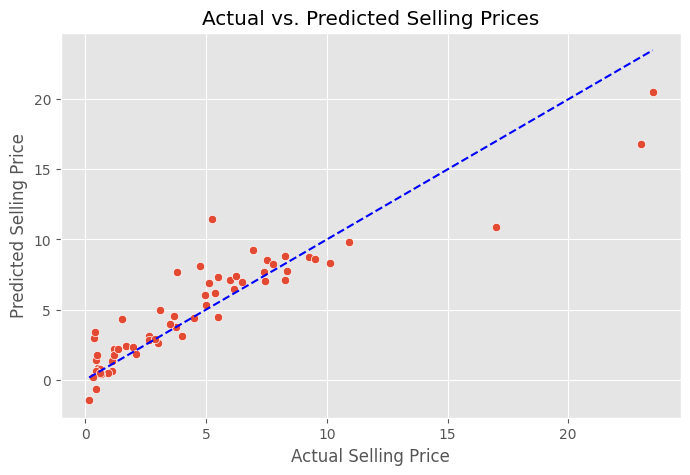

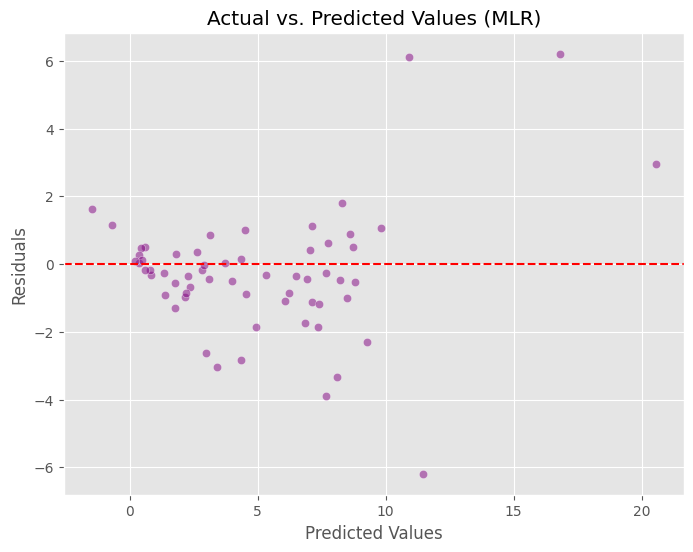

In [683]:
# Al Generated Model (By Trial and Error)
inputs2 = df[[
             'Year',
             'Present_Price',
             'Kms_Driven',
             'Seller_Type',
             'Fuel_Type',
             'Transmission',
             'Owner'
            ]]
outputs2 = df.Selling_Price

# Drop unnecessary columns
if 'Car_Name' in df.columns:
    df.drop(columns=['Car_Name'], inplace=True)  # Car name is categorical and non-numeric

# Identify categorical columns
categorical_cols = ['Fuel_Type', 'Seller_Type', 'Transmission']
df.label_encoders = {} # Assign an empty dictionary to df.label_encoders

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder() # Create a LabelEncoder object
    df[col] = le.fit_transform(df[col])
    df.label_encoders[col] = le  # Store encoders if needed later

# Check for missing values and fill them
df.fillna(df.median(), inplace=True)

# Define features and target variable
X = df.drop(columns=['Selling_Price'])  # Features
y = df['Selling_Price']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the MLR model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)


# Display Coefficients
coefficients = pd.DataFrame(mlr_model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)
# Display Interceps
print(f"Intercept: {mlr_model.intercept_}")

# Make predictions on the test set

y_pred = mlr_model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


# Scatter plot for Actual vs. Predicted Prices
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--')  # Identity line
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs. Predicted Selling Prices")
plt.show()

# Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.title('Actual vs. Predicted Values (MLR)')
plt.show()

